In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Import dependencies
%matplotlib inline
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [3]:
##Bring in csv file for consumption data
consumption = pd.read_csv("../input_data/consumption.csv")

#Bring in csv file for emissions data
emissions = pd.read_csv("../input_data/emissions.csv")


# View and Prepare the Data

In [4]:
##View the first 5 rows of consumption data
consumption.head()

,Unnamed: 0,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,AL,64,62,68,71,78,97,100,101,431,1812,3425
1,AK,2,3,3,3,3,3,3,3,14,20,28
2,AZ,3112,3445,4518,7604,18096,31405,43572,48236,52862,66326,70800
3,AR,53,59,80,85,100,108,111,124,372,442,2118
4,CA,29985,31297,36006,41816,53911,84832,156494,211876,267580,340408,381733


In [5]:
##View the first 5 rows of emissions data
emissions.head()

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AL,139.666603,120.020443,132.722932,129.812612,123.039324,120.732885,123.080771,120.012608,114.872696,109.018634
1,AK,39.435905,37.788246,38.729384,38.585774,38.039447,35.975289,35.171091,36.067852,34.739390,34.295441
2,AZ,102.125070,93.252826,95.204594,93.282044,91.256850,95.060822,93.120620,90.856296,86.971877,86.137839
3,AR,64.059757,61.367031,65.723403,67.168798,65.940126,68.354108,68.985869,59.176044,62.319791,64.277677
4,CA,379.480916,366.184902,360.953079,346.864178,351.496006,354.219000,351.477053,359.290429,359.261859,360.913489


In [6]:
##Clean up consumption data to match fields in emissions data(rename column 1 to State, delete 2018 column)
consumption= consumption.rename(columns={"Unnamed: 0": "State"})

consumption.drop('2018', axis=1, inplace=True)
consumption.head()



,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,AL,64,62,68,71,78,97,100,101,431,1812
1,AK,2,3,3,3,3,3,3,3,14,20
2,AZ,3112,3445,4518,7604,18096,31405,43572,48236,52862,66326
3,AR,53,59,80,85,100,108,111,124,372,442
4,CA,29985,31297,36006,41816,53911,84832,156494,211876,267580,340408


In [7]:
##Set state as the index in both dataframes
emissions.set_index("State", inplace=True)
consumption.set_index("State", inplace=True)

#put the states into a list to use on the scatterplot
state_list = list(emissions.index)


In [9]:
print(f"Number of emissions rows: {len(emissions)}")
print(f"Number of consumption rows: {len(consumption)}")

Number of emissions rows: 51
Number of consumption rows: 51


# Look for correlations

In [60]:
##Create a function to calculate regression information and create the scatterplot
def scatterplots():
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(consump, emiss)
    
    regress_values = consump * slope + intercept
    
    line_eq = f"y = {round(slope,3)}x + {round(intercept,2)}" 
    
    plt.scatter(consump, emiss)
    plt.xlabel("Solar Consumption")
    plt.ylabel("Emissions")
    plt.title(f"Emissions vs. Solar Consumption for {year}")
    plt.plot(consump, regress_values, "r-")
    plt.annotate(line_eq, (x_coord,y_coord),color = 'hotpink', fontsize=18)
    clb = plt.colorbar()
    clb.set_label("Total Emissions")
 
# This added state names to the points on the scatterplot
#     for i, name in enumerate(state_list):
#         plt.annotate(name, (consump[i],emiss[i]))
        
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"../output/consumption{year}.png")
    plt.show()
    

In [11]:
##Create a function to make scatterplots for each year
# def scatterplots():
#     plt.scatter(consump, emiss)
#     plt.xlabel("Solar Consumption")
#     plt.ylabel("Emissions")
#     plt.title(f"Emissions vs. Solar Consumption for {year}")
#     plt.annotate(annotation, (x_coord,y_coord))
#     plt.show()


The r-squared is: 0.14062053708909236


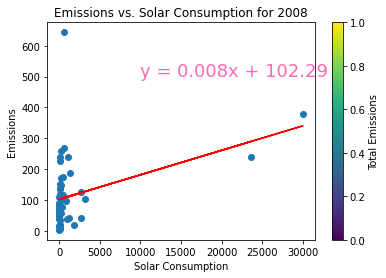

In [53]:
##2008 -- First year
emiss = emissions["2008"] 
consump = consumption["2008"]
year = "2008"
x_coord = 10000
y_coord = 500
scatterplots()



No observable correlation between Solar Consumption and Emissions in 2008

The r-squared is: 0.13383141607939555


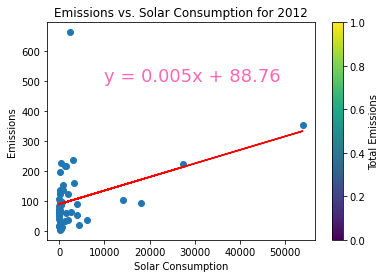

In [54]:
##2012 - A year in the middle
emiss = emissions["2012"]
consump = consumption["2012"]
year = "2012"
x_coord = 10000
y_coord = 500
scatterplots()

No observable correlation between Solar Consumption and Emissions in 2012

The r-squared is: 0.1404103573668808


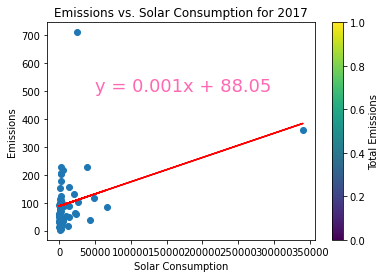

In [55]:
##2017 -- The last year we have data for
emiss = emissions["2017"]
consump = consumption["2017"]
year = "2017"
x_coord = 50000
y_coord = 500
scatterplots()

No observable correlation between Solar Consumption and Emissions in 2017

The r-squared is: 0.13590769852157916


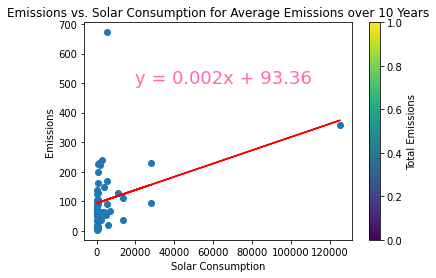

In [56]:
##Compare the average emissions to the average consumption over the 10 years
emiss = emissions.mean(axis=1)
consump = consumption.mean(axis=1)
year = "Average Emissions over 10 Years"
x_coord = 20000
y_coord = 500
scatterplots()

No observable correlation between the average Solar Consumption and the average Emissions 

The r-squared is: 0.13590769852157938


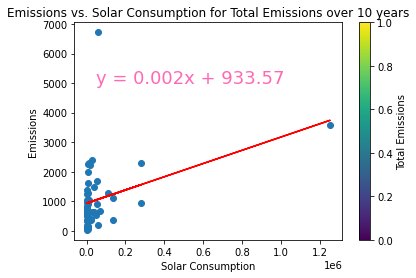

In [57]:
##Compare the total emissions to the total consumption over the 10 years
emiss = emissions.sum(axis=1)
consump = consumption.sum(axis=1)
year = "Total Emissions over 10 years"
x_coord = 50000
y_coord = 5000
scatterplots()


No observable correlation between the Total Solar Consumption and the Total Emissions 

In [58]:
##Calculate change in emissions from 2008 to 2017 and capture the 5 states with largest changes and 5 smallest changes
emis_change = emissions['2017']-emissions['2008']
emis_change = emis_change.sort_values(0, ascending=False)
top_five_emis = emis_change.head()
bottom_five_emis = emis_change.tail()
bottom_five_emis

State
IL   -38.388519
GA   -39.051897
IN   -50.122083
PA   -50.807020
OH   -54.293206
dtype: float64

# Analysis of States of Interest

In [59]:
five_states_emis = emissions.iloc[(emissions.index == "OH") | (emissions.index =="PA") | 
                                  (emissions.index =="TX") | (emissions.index =="WA") | (emissions.index =="VT")]

five_states_consump = consumption.iloc[(consumption.index == "OH") | (consumption.index =="PA") | 
                                  (consumption.index =="TX") | (consumption.index =="WA") | (consumption.index =="VT")]

state_list = list(five_states_emis.index)
five_states_consump

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,
OH,202,249,438,564,1176,1345,1567,1679,1875,2436
PA,605,738,1435,2552,3122,3511,3708,3759,4072,4686
TX,550,622,854,1280,2419,3222,4817,6398,10948,25156
VT,84,97,107,173,280,461,627,1044,1335,2029
WA,108,123,155,201,270,337,471,649,958,1201


The r-squared is: 0.9200577939576501


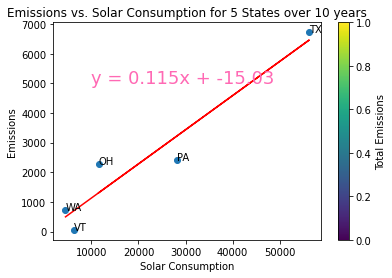

In [61]:
##Compare the total emissions to the total consumption over the 10 years
emiss = five_states_emis.sum(axis=1)
consump = five_states_consump.sum(axis=1)
year = "5 States over 10 years"
x_coord = 10000
y_coord = 5000
scatterplots()

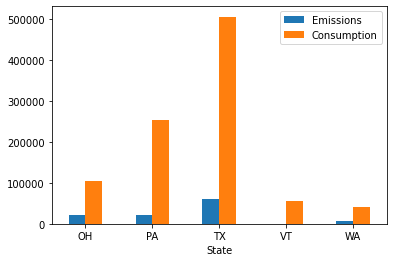

In [73]:
##Create a double bar chart of total emissions and total consumption
five_states_emis["Total"] = five_states_emis.sum(axis=1)
five_states_consump["Total"] = five_states_consump.sum(axis=1)

df = pd.DataFrame ({
    "Emissions": five_states_emis["Total"],
    "Consumption": five_states_consump["Total"]
})

ax = df.plot.bar(rot=0)

plt.savefig(f"../output/consumption_bar.png")

# Calculate emissions to consumption percentages and analyze the results

In [44]:
##Merge the 2 dataframes
#merged_df = pd.merge(emissions, consumption, how='inner', on='State', suffixes=('_emis', '_con'))

merged_df = pd.merge(five_states_emis, five_states_consump, how="inner", on="State", suffixes=('_emis', '_con'))

merged_df.head()
#merged_df.dtypes

,2008_emis,2009_emis,2010_emis,2011_emis,2012_emis,2013_emis,2014_emis,2015_emis,2016_emis,2017_emis,2008_con,2009_con,2010_con,2011_con,2012_con,2013_con,2014_con,2015_con,2016_con,2017_con
State,,,,,,,,,,,,,,,,,,,,
OH,259.915008,234.975715,247.141718,235.368188,215.376323,229.601220,231.666146,212.891632,206.407588,205.621802,202,249,438,564,1176,1345,1567,1679,1875,2436
PA,267.457907,242.407980,254.419583,247.126263,236.353959,246.092075,245.894238,229.691958,216.636771,216.650887,605,738,1435,2552,3122,3511,3708,3759,4072,4686
TX,643.698700,611.110086,648.818958,666.708188,662.002423,696.845756,693.485215,693.100945,695.363753,710.994283,550,622,854,1280,2419,3222,4817,6398,10948,25156
VT,5.901652,6.132742,5.854555,5.782272,5.430809,5.720077,5.867586,6.125115,5.917026,5.833906,84,97,107,173,280,461,627,1044,1335,2029
WA,75.157759,72.977136,73.044555,68.149752,67.912628,72.679159,71.204237,73.062390,78.443075,78.732677,108,123,155,201,270,337,471,649,958,1201


In [45]:
##Calculate the percentage of emissions to consumption
emis_to_con_2008 = round((merged_df["2008_emis"]/merged_df["2008_con"])*100 ,2)
emis_to_con_2009 = round((merged_df["2009_emis"]/merged_df["2009_con"])*100 ,2)
emis_to_con_2010 = round((merged_df["2010_emis"]/merged_df["2010_con"])*100 ,2)
emis_to_con_2011 = round((merged_df["2011_emis"]/merged_df["2011_con"])*100 ,2)
emis_to_con_2012 = round((merged_df["2012_emis"]/merged_df["2012_con"])*100 ,2)
emis_to_con_2013 = round((merged_df["2013_emis"]/merged_df["2013_con"])*100 ,2)
emis_to_con_2014 = round((merged_df["2014_emis"]/merged_df["2014_con"])*100 ,2)
emis_to_con_2015 = round((merged_df["2015_emis"]/merged_df["2015_con"])*100 ,2)
emis_to_con_2016 = round((merged_df["2016_emis"]/merged_df["2016_con"])*100 ,2)
emis_to_con_2017 = round((merged_df["2017_emis"]/merged_df["2017_con"])*100 ,2)


In [46]:
##Create a new dataframe with the percentage results
percent_df = pd.DataFrame({
    "2008": emis_to_con_2008,
    "2009": emis_to_con_2009,
    "2010": emis_to_con_2010,
    "2011": emis_to_con_2011,
    "2012": emis_to_con_2012,
    "2013": emis_to_con_2013,
    "2014": emis_to_con_2014,
    "2015": emis_to_con_2015,
    "2016": emis_to_con_2016,
    "2017": emis_to_con_2017
})
percent_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
State,,,,,,,,,,
OH,128.67,94.37,56.43,41.73,18.31,17.07,14.78,12.68,11.01,8.44
PA,44.21,32.85,17.73,9.68,7.57,7.01,6.63,6.11,5.32,4.62
TX,117.04,98.25,75.97,52.09,27.37,21.63,14.40,10.83,6.35,2.83
VT,7.03,6.32,5.47,3.34,1.94,1.24,0.94,0.59,0.44,0.29
WA,69.59,59.33,47.13,33.91,25.15,21.57,15.12,11.26,8.19,6.56


In [47]:
##Calculate the average emission vs consumption across all of the years for each state
percent_df["Average"] = percent_df.mean(axis=1)
percent_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Average
State,,,,,,,,,,,
OH,128.67,94.37,56.43,41.73,18.31,17.07,14.78,12.68,11.01,8.44,40.349
PA,44.21,32.85,17.73,9.68,7.57,7.01,6.63,6.11,5.32,4.62,14.173
TX,117.04,98.25,75.97,52.09,27.37,21.63,14.40,10.83,6.35,2.83,42.676
VT,7.03,6.32,5.47,3.34,1.94,1.24,0.94,0.59,0.44,0.29,2.760
WA,69.59,59.33,47.13,33.91,25.15,21.57,15.12,11.26,8.19,6.56,29.781


In [44]:
##Sort by the average  --- Don't need this, switched to analyzing 5 states 
# percent_df = percent_df.sort_values('Average')
# percent_df.head()
# lowest_emis_to_con = percent_df.head()
# highest_emis_to_con = percent_df.tail()

In [48]:
##Create Groups by emission to consumption percentages for comparision
#percent_df["Average"]

In [49]:
##Separate the states into groups by emission/consumption percentages and create a new column. 
# bins = [0, 10, 50, 500, 1200]

# group_labels = ["Low Emis %", "Medium Emis %", "High Emis %", "Very High %"]

# percent_df["Category"] = pd.cut(percent_df["Average"], bins, labels=group_labels)
# percent_df.head()

In [50]:
# ##Group by the emissions to consumption percent categories
# emission_group = percent_df.groupby("Category")

# ##Find out how many in each group
# print(emission_group["Average"].count())

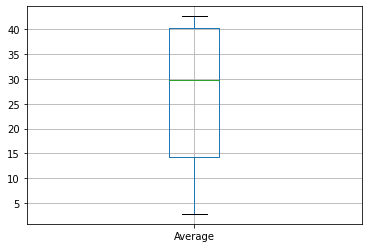

In [62]:
#Create a boxplot to compare means of Averages
percent_df.boxplot("Average")
plt.show()

In [51]:
##Extract individual groups
# group1 = percent_df[percent_df["Category"] == "Low Emis %"]["Average"]
# group2 = percent_df[percent_df["Category"] == "Medium Emis %"]["Average"]
# group3 = percent_df[percent_df["Category"] == "High Emis %"]["Average"]
# group4 = percent_df[percent_df["Category"] == "Very High %"]["Average"]

In [64]:
##Perform the ANOVA
#stats.f_oneway(group1, group2, group3, group4)
#stats.f_oneway(percent_df[0], percent_df[1], percent_df[2],percent_df[3], percent_df[4])